## Введение в DS и  машинное обучение

### Знакомство с Pandas

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.iloc[0:10,0:5]

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
5,female,group B,associate's degree,standard,none
6,female,group B,some college,standard,completed
7,male,group B,some college,free/reduced,none
8,male,group D,high school,free/reduced,completed
9,female,group B,high school,free/reduced,none


In [6]:
mean_math_score = df['math score'].mean()
mean_math_score

66.089

### Фильтрация данных

In [7]:
# отбираем наблюдения только женского пола, у которых math score больше среднего
df_mean_scrore = df.loc[(df.gender == 'female') & (df['math score'] > mean_math_score),['gender', 'math score']]

In [8]:
# задача 2
len(df.lunch.loc[df.lunch == 'free/reduced']) / len(df)

0.355

In [9]:
standard_lunch_stud = df.loc[df.lunch == 'standard']
free_reduced_lunch_stud = df.loc[df.lunch == 'free/reduced']

In [10]:
# задача 3
standard_lunch_stud.describe()


,math score,reading score,writing score
count,355.000000,355.000000,355.000000
mean,58.921127,64.653521,63.022535
std,15.159956,14.895339,15.433823
min,0.000000,17.000000,10.000000
25%,49.000000,56.000000,53.000000
50%,60.000000,65.000000,64.000000
75%,69.000000,75.000000,74.000000
max,100.000000,100.000000,100.000000


In [11]:
# задача 3
free_reduced_lunch_stud.describe()

,math score,reading score,writing score
count,355.000000,355.000000,355.000000
mean,58.921127,64.653521,63.022535
std,15.159956,14.895339,15.433823
min,0.000000,17.000000,10.000000
25%,49.000000,56.000000,53.000000
50%,60.000000,65.000000,64.000000
75%,69.000000,75.000000,74.000000
max,100.000000,100.000000,100.000000


In [12]:
# делаем название колонок удобными

df = df.rename(columns={'parental level of education':'parental_level_of_education',
                        'test preparation course': 'test_preparation_course', 
                        'math score': 'math_score',
                        'reading score': 'reading_score', 
                        'writing score': 'writing_score'})

In [13]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
# отбираем данные по какому то условю вручную

df.loc[df.writing_score > 99].head(5)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
106,female,group D,master's degree,standard,none,87,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
165,female,group C,bachelor's degree,standard,completed,96,100,100
179,female,group D,some high school,standard,completed,97,100,100
377,female,group D,master's degree,free/reduced,completed,85,95,100


In [15]:
# то же самое, используя метод query()

df.query('writing_score > 99').head(5)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
106,female,group D,master's degree,standard,none,87,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
165,female,group C,bachelor's degree,standard,completed,96,100,100
179,female,group D,some high school,standard,completed,97,100,100
377,female,group D,master's degree,free/reduced,completed,85,95,100


In [14]:
# использование переменных в query осуществляется с помощью @

writing_score_query = 80
df.query('writing_score > @writing_score_query').head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
6,female,group B,some college,standard,completed,88,95,92
16,male,group C,high school,standard,none,88,89,86
34,male,group E,some college,standard,none,97,87,82


In [18]:
# непандосовый способ отбора колонок

score_colmns = [i for i in list(df) if 'score' in i]
df[score_colmns].head()

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [19]:
# пандосовый способ отбора колонок

df.filter(like='score').head()

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


### Группировка и агрегация данных

In [20]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [21]:
# группируем данные по полу и находим для них средние значения оценок

df.groupby('gender', as_index= False)\
    .aggregate({'math_score': 'mean', 'reading_score': 'mean' })\
        .rename(columns = {'math_score': 'mean_math_score','reading_score': 'mean_reading_score' })

,gender,mean_math_score,mean_reading_score
0,female,63.633205,72.608108
1,male,68.728216,65.473029


In [22]:
# группируем данные по нескольким признакам

df.groupby(['gender', 'race/ethnicity'], as_index= False)\
    .aggregate({'math_score': 'mean', 'reading_score': 'mean' })\
        .rename(columns = {'math_score': 'mean_math_score','reading_score': 'mean_reading_score' })

,gender,race/ethnicity,mean_math_score,mean_reading_score
0,female,group A,58.527778,69.000000
1,female,group B,61.403846,71.076923
2,female,group C,62.033333,71.944444
3,female,group D,65.248062,74.046512
4,female,group E,70.811594,75.840580
5,male,group A,63.735849,61.735849
6,male,group B,65.930233,62.848837
7,male,group C,67.611511,65.424460
8,male,group D,69.413534,66.135338
9,male,group E,76.746479,70.295775


In [24]:
# мульти индексы

score_mean = df.groupby(['gender', 'race/ethnicity'])\
    .aggregate({'math_score': 'mean', 'reading_score': 'mean' })\
        .rename(columns = {'math_score': 'mean_math_score','reading_score': 'mean_reading_score' })

In [25]:
score_mean.index

MultiIndex([('female', 'group A'),
            ('female', 'group B'),
            ('female', 'group C'),
            ('female', 'group D'),
            ('female', 'group E'),
            (  'male', 'group A'),
            (  'male', 'group B'),
            (  'male', 'group C'),
            (  'male', 'group D'),
            (  'male', 'group E')],
           names=['gender', 'race/ethnicity'])

In [26]:
# находим топ 5 математиков девушек и мальчиков

df.sort_values(['gender','math_score' ],ascending= False) \
    .groupby('gender').head(5)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100
306,male,group E,some college,standard,completed,99,87,81
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
263,female,group E,high school,standard,none,99,93,90


In [27]:
# добавляем в датафрейм новую колонку 'total_score'

df['total_score'] = (df.math_score+df.reading_score+df.writing_score)

In [28]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [29]:
# метод assign для добавления новых колонок 

df = df.assign(total_score_mean = df.total_score/3)

In [30]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,total_score_mean
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [20]:
# удаляем ненужные колонки методом drop

df.drop(['total_score'], axis=1).head(5)

KeyError: "['total_score'] not found in axis"

In [22]:
# Задача 1
# Пересчитаем число ног у героев игры Dota2!

dota_hero_stats = pd.read_csv('dota_hero_stats.csv')

In [23]:
dota_hero_stats.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [25]:
dota_hero_stats.groupby('legs').describe()

Unnamed: 0                                                         id  \
          count       mean        std   min   25%   50%   75%    max count   
legs                                                                         
0          11.0  46.000000  32.227318   9.0  20.0  38.0  76.0   92.0  11.0   
2          95.0  58.789474  34.307091   0.0  29.5  58.0  86.5  116.0  95.0   
4           7.0  61.714286  31.721256   2.0  53.0  61.0  84.0   95.0   7.0   
6           3.0  68.000000  46.679760  15.0  50.5  86.0  94.5  103.0   3.0   
8           1.0  59.000000        NaN  59.0  59.0  59.0  59.0   59.0   1.0   

                                                           
           mean        std   min   25%   50%   75%    max  
legs                                                       
0     47.727273  32.554849  10.0  21.5  40.0  78.0   94.0  
2     60.842105  34.994928   1.0  31.5  60.0  88.5  129.0  
4     63.571429  32.035694   3.0  55.0  63.0  86.0   97.0  
6     69.666667  47.247575  16.0  52.0  88.0  96.5  105.0  
8     61.000000        NaN  61.0  61.0  61.0  61.0   61.0

In [26]:
# Задача 2
# Зарплаты Лупы и Пупы
accountancy = pd.read_csv('accountancy.csv')
accountancy.head()

,Unnamed: 0,Executor,Type,Salary
0,0,Pupa,D,63
1,1,Pupa,A,158
2,2,Pupa,D,194
3,3,Pupa,E,109
4,4,Loopa,E,184


In [27]:
accountancy.groupby(['Executor','Type'], as_index= False).aggregate({'Salary': 'mean'})

,Executor,Type,Salary
0,Loopa,A,58.000000
1,Loopa,B,145.166667
2,Loopa,C,154.333333
3,Loopa,D,137.714286
4,Loopa,E,164.000000
5,Loopa,F,238.000000
6,Pupa,A,160.833333
7,Pupa,B,77.000000
8,Pupa,C,74.500000
9,Pupa,D,146.500000


In [28]:
# Задача 3
# Найти самый распространённый набор характеристик.
dota_hero_stats.groupby(['attack_type','primary_attr']).count()

Unnamed: 0  id  legs  localized_name  name  roles
attack_type primary_attr                                                   
Melee       agi                   19  19    19              19    19     19
            int                    2   2     2               2     2      2
            str                   35  35    35              35    35     35
Ranged      agi                   18  18    18              18    18     18
            int                   40  40    40              40    40     40
            str                    3   3     3               3     3      3

In [30]:
# Задача 4
#Аспирант Ростислав изучает метаболом водорослей и получил такую табличку. В ней он записал вид каждой водоросли, её род (группа, объединяющая близкие виды), 
#группа (ещё одно объединение водорослей в крупные фракции) и концентрации анализируемых веществ.
#Помогите Ростиславу найти среднюю концентрацию каждого из веществ в каждом из родов (колонка genus)!
date = pd.read_csv('algae.csv')

In [41]:
date.head()

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886


In [43]:
date.groupby('genus').aggregate({'sucrose':'mean','alanin':'mean', 'citrate':'mean', 'glucose':'mean',
       'oleic_acid':'mean'})

,sucrose,alanin,citrate,glucose,oleic_acid
genus,,,,,
Ascophyllum,6.825467,0.875429,5.253527,3.414961,2.432526
Cladophora,4.008792,3.997055,5.288311,2.800276,2.263472
Fucus,4.355112,3.566411,4.214878,2.814803,3.367647
Palmaria,0.704580,3.176440,5.573905,3.242090,2.245538
Saccharina,4.183596,3.524207,3.346710,4.980594,4.487252


In [36]:
# Задача 5

date.query('genus == "Fucus"').describe()

,sucrose,alanin,citrate,glucose,oleic_acid
count,3.000000,3.000000,3.000000,3.000000,3.000000
mean,4.355112,3.566411,4.214878,2.814803,3.367647
std,2.110570,3.149943,2.691679,0.713559,3.050376
min,3.001472,0.346431,1.216767,2.272724,0.304573
25%,3.139171,2.028965,3.110515,2.410591,1.848888
50%,3.276870,3.711498,5.004262,2.548459,3.393203
75%,5.031933,5.176401,5.713934,3.085842,4.899184
max,6.786996,6.641303,6.423606,3.623225,6.405165


### Визуализация Seaborn

In [37]:
import pandas as pd
import numpy as np


In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
students_performance = pd.read_csv('StudentsPerformance.csv')

In [40]:
students_performance = students_performance.rename(columns={'parental level of education':'parental_level_of_education', 
                             'test preparation course':'test_preparation_course', 'math score':'math_score', 
                             'reading score':'reading_score','writing score':'writing_score'})

In [49]:
students_performance.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


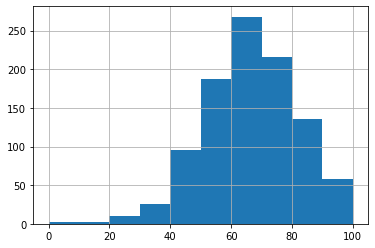

In [50]:
# встроенная визуализация pandas

students_performance.math_score.hist()

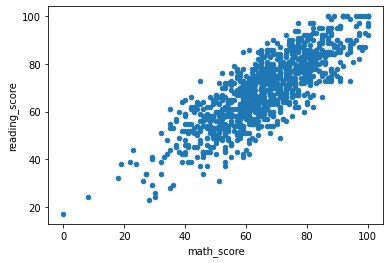

In [51]:
# построение scatter plot

students_performance.plot.scatter(x='math_score', y ='reading_score' )

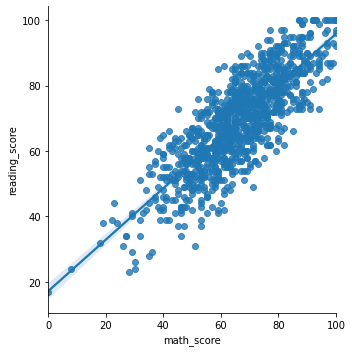

In [52]:
# построение scatter plot, используя seaborn

sns.lmplot(x='math_score', y ='reading_score', data=students_performance)

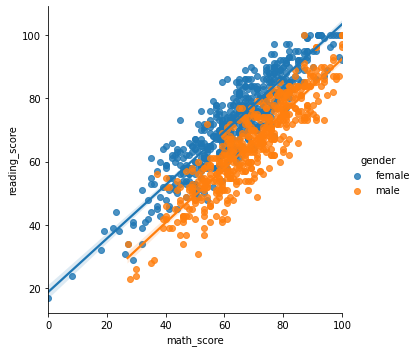

In [42]:
# добавляем группировку по полу hue='gender'

sns.lmplot(x='math_score', y ='reading_score',hue='gender', data=students_performance)

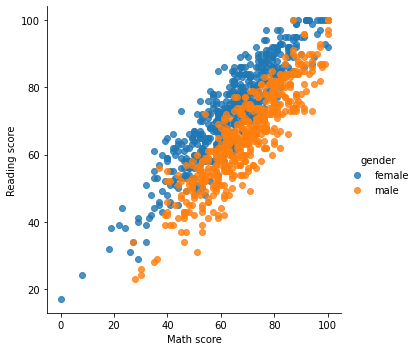

In [54]:
# убрали регрессионные прямые fit_reg=False
# и добавили подписи к осям
ax = sns.lmplot(x='math_score', y ='reading_score',hue='gender', data=students_performance,fit_reg=False)
ax.set_xlabels('Math score')
ax.set_ylabels('Reading score')

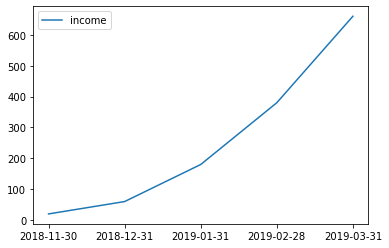

In [55]:
# Задача 2

df = pd.read_csv('income.csv')
sns.lineplot(data=df)

In [43]:
# Задача 3

df = pd.read_csv('dataset_209770_6 (1).txt', sep=' ')
df.head()

,x,y
0,903.457968,601.381145
1,101.450178,811.693718
2,296.931632,95.784660
3,186.389986,1207.285848
4,1084.793570,208.632339


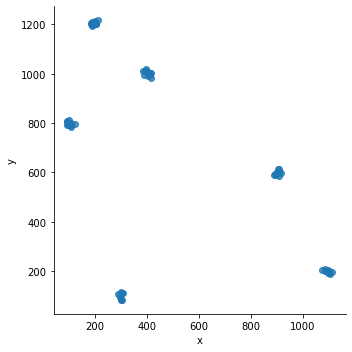

In [44]:
sns.lmplot(x='x',y='y', data=df, fit_reg=False)

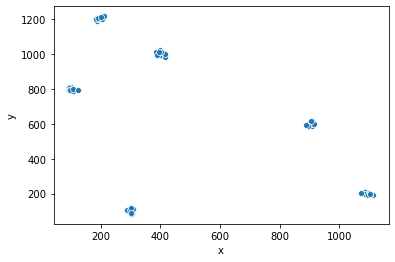

In [45]:
sns.scatterplot(df.iloc[:,0], df.iloc[:,1])

In [47]:
# Задача 4

df = pd.read_csv('genome_matrix.csv', index_col=0)
df.head()

,species0,species1,species2,species3,species4
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214
species2,0.679708,0.887593,0.595156,0.003435,0.096052
species3,0.840606,0.769754,0.003435,0.458870,0.029251
species4,0.430842,0.203214,0.096052,0.029251,0.642109


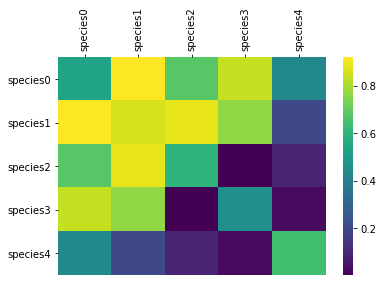

In [59]:
# создаем тепловую карту
g = sns.heatmap(df,cmap='viridis')
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

In [50]:
# Задача 5

dota_task = pd.read_csv('dota_hero_stats.csv',index_col=0)
dota_task.head()

,attack_type,id,legs,localized_name,name,primary_attr,roles
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [135]:
def str_to_list(dota_task_roles):
    n = []
    for i in dota_task_roles:
        res = [element.strip("'[]") for element in i.split(", ")]
        n.append(len(res))
    return n


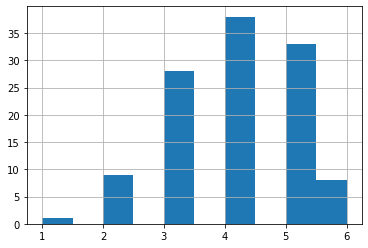

In [139]:
count_of_roles = str_to_list(dota_task.roles)
dota_task['count_of_roles'] = count_of_roles
dota_task.count_of_roles.hist()

In [152]:
# Задача 6

df = pd.read_csv('iris.csv',index_col=0)
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


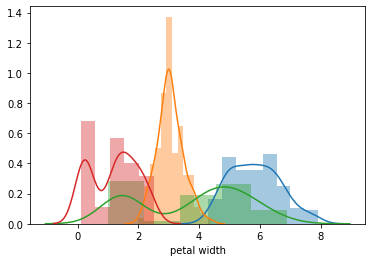

In [81]:
for i in df.columns[1:5]:
    ax = sns.distplot(df[i])

In [151]:
df.species.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

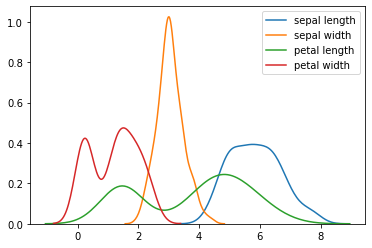

In [82]:
for i in df.columns[1:5]:
    ax = sns.kdeplot(df[i])

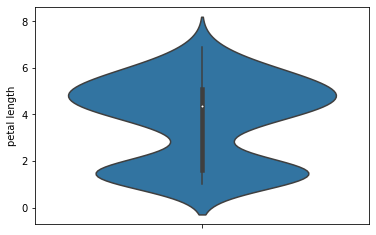

In [154]:
# Задача 7
sns.violinplot(y = df['petal length'])

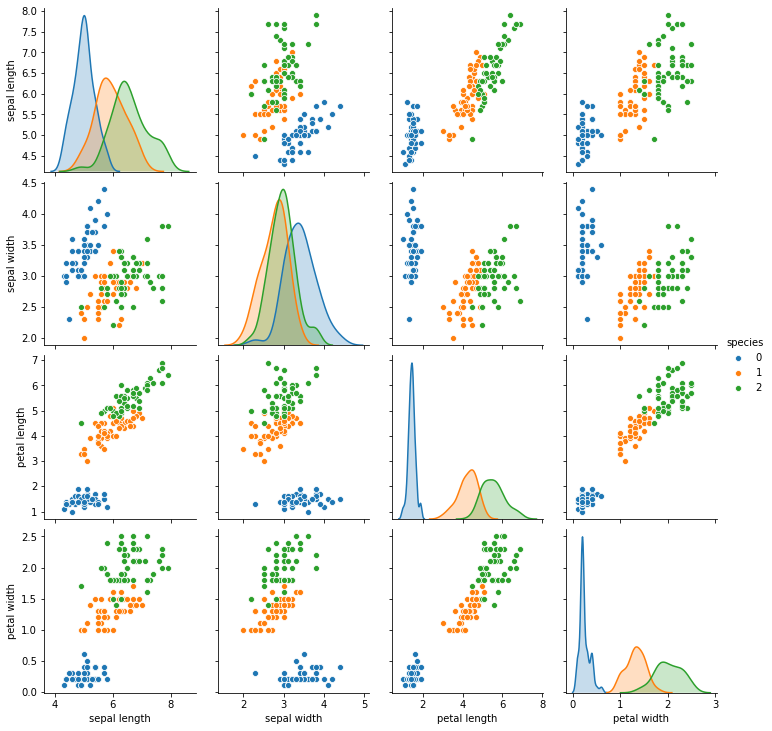

In [157]:
# Задача 8
sns.pairplot(df,hue = 'species')